In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
import numpy as np
from scipy.spatial import cKDTree

In [2]:
field, filt = 1, '3p6'
kaluzny_file = 'Kaluzny2004rrl.txt'
fitspath = '../calibrated_files/fitsimg/omegaCen_{}_{}um.fits'.format(field,filt)

In [3]:
kaluz = pd.read_csv('Kaluzny2004rrl.txt', delim_whitespace=True)
wcs = WCS(fits.getheader(fitspath))
coords = SkyCoord(kaluz['ra'],kaluz['dec'], unit=('hour','degree'))

In [4]:
colnames = [['id'],['x'],['y']]
colnames += [['mag_{}'.format(i), 'merr_{}'.format(i)] for i in range(1,14)]
colnames = sum(colnames, [])

In [5]:
photdf = pd.read_csv('../calibrated_files/omegaCen_{}_{}um.cal'.format(field,filt),
                     delim_whitespace=True, names=colnames)

In [6]:
photwcscoo = wcs.all_pix2world(photdf.x,photdf.y,1)
coords2 = SkyCoord(photwcscoo[0],photwcscoo[1],unit='degree')

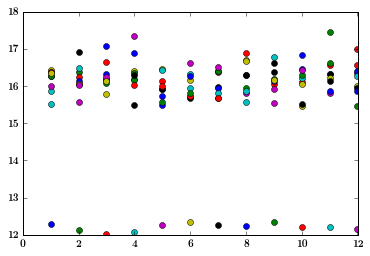

In [13]:
ids,d2d,d3d=coords.match_to_catalog_sky(coords2)
cond = (d2d.value<0.002)
#ids[cond]
photdf[photdf.id.isin(ids[cond])]
for j in range(10):
    for i in range(1,13):
        mags = photdf['mag_{}'.format(i)]
        plt.plot(i,mags[j],'o')

In [ ]:
rrlcoo = np.asarray(wcs.all_world2pix(coords.ra,coords.dec,0)).T
photcoo = np.array([photdf.x.values, photdf.y.values]).T

In [ ]:
rrltree = cKDTree(rrlcoo)
phottree = cKDTree(photcoo)

In [ ]:
herp = rrltree.query_ball_tree(phottree, 2)
derp = [i[0] for i in herp if len(i) > 0]
print derp